In [1]:
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins
import ipywidgets
import geocoder
import geopy

%matplotlib inline

In [2]:
trout=pd.read_csv('../data/wintertrout_restock.csv')
fish=pd.read_csv('../data/fish_regulations.csv')
camp = gpd.read_file('../data/TN_State_Parks_Campsites.geojson')
water = gpd.read_file('../data/water_in_tn.geojson')

In [3]:
camp.columns

Index(['FID', 'TSP_CMPSTE_UID', 'TSP_CMPGRD_UID', 'SITE_NO', 'SITE_NAME',
       'ITINIO_ID', 'TSP_UID', 'PARK_NAME', 'geometry'],
      dtype='object')

In [4]:
camp = camp[['TSP_CMPSTE_UID', 'TSP_CMPGRD_UID', 'SITE_NO', 'SITE_NAME',
       'ITINIO_ID', 'TSP_UID', 'PARK_NAME', 'geometry']]

In [5]:
camp.columns=["Park Campsite ID", "Park Campground ID", "Site No", "Site Name",
       'ITINIO_ID', "Park ID", "park_name", 'geometry']

In [6]:
camp.shape

(3238, 8)

<AxesSubplot:>

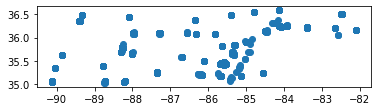

In [7]:
camp.plot()

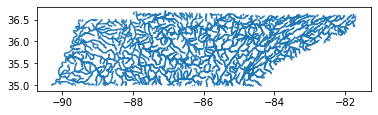

In [8]:
water.plot();

In [9]:
water.head(2)

Name          Feature     State  Region  Miles  Shape__Length  \
0  Tennessee River  Artificial Path  AL-MS-TN       6   2.07       0.030367   
1      Sugar Creek           Stream     AL-TN       6   0.38       0.005340   

                                            geometry  
0  LINESTRING (-88.19653 34.98789, -88.20003 34.9...  
1  LINESTRING (-87.19329 35.00010, -87.19276 34.9...

In [10]:
#folium.Map?

In [11]:
TN=(36.2800424,-85.7026846)
map = folium.Map(location=TN, zoom_start=6.4)

In [12]:
#water.crs={'init' :'epsg:4326'}

In [13]:
camp['lon'] = camp['geometry'].x
camp['lat'] = camp['geometry'].y

In [14]:
camp.shape

(3238, 10)

In [15]:
camp_drop=camp.drop_duplicates(subset= 'park_name', keep= 'first')

In [16]:
camp["Site Name"].value_counts()

Campsite 17                18
Campsite 6                 18
Campsite 12                18
Campsite 3                 18
Campsite 9                 18
                           ..
Foster Falls Campsite 6     1
Campsite B37                1
B Loop Campsite 50          1
Airpark Campsite 2          1
Campsite C38                1
Name: Site Name, Length: 2161, dtype: int64

In [17]:
camp_site=camp.drop_duplicates(subset= "Site Name", keep= 'first')

In [18]:
camp_site.shape

(2162, 10)

In [19]:
camp_drop.shape

(39, 10)

In [20]:
camp_drop.head()

Park Campsite ID Park Campground ID Site No             Site Name  \
0  TSP-0167-00-01-006     TSP-0167-00-01       6            Campsite 6   
1  TSP-0225-00-01-032     TSP-0225-00-01     32H          Campsite 32H   
2  TSP-0279-00-02-147     TSP-0279-00-02      78  Fairview Campsite 78   
3  TSP-0171-00-01-091     TSP-0171-00-01     103          Campsite 103   
5  TSP-0183-00-01-015     TSP-0183-00-01      15      East Campsite 15   

  ITINIO_ID   Park ID                        park_name  \
0     4_180  TSP-0168  Meeman-Shelby Forest State Park   
1    22_834  TSP-0225           Rock Island State Park   
2   24_1027  TSP-0279             Tims Ford State Park   
3    18_655  TSP-0171       Montgomery Bell State Park   
5    32_560  TSP-0183            Norris Dam State Park   

                     geometry        lon        lat  
0  POINT (-90.04724 35.34502) -90.047245  35.345022  
1  POINT (-85.64584 35.81251) -85.645837  35.812512  
2  POINT (-86.16014 35.20048) -86.160141  35.200481  
3  POINT (-87.28788 36.09856) -87.287883  36.098555  
5  POINT (-84.08282 36.22130) -84.082825  36.221298

In [21]:
folium.Choropleth(water,line_weight=3,line_color='blue').add_to(map)

#cluster map for campgrounds
marker_cluster = MarkerCluster().add_to(map)

# plugin for mini map
#minimap = plugins.MiniMap(toggle_display=True)

# add minimap to map
#map.add_child(minimap)

# add scroll zoom toggler to map
#plugins.ScrollZoomToggler().add_to(map)

# add full screen button to map
#plugins.Fullscreen(position='topright').add_to(map)

#popups
for row_index, row_values in camp_drop.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values["park_name"])
    icon=folium.Icon(color="green",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)
    
map

In [22]:
#folium.GeoJson(poverty_tract, 
#               tooltip = GeoJsonTooltip(fields=['tract','cash_snap_asst','per_capita_income'],
#                                                 aliases=['Tract #','# Households Rec. Public Asst.',
#                                                          'Per Capita Income'],
#                                                 labels=True,
#                                                 sticky=True,
#                                                 toLocalestring=True)
#              ).add_to(census_map)

In [23]:
# make stream invisible but keep tooltip.